In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv("../data/kjv.csv")
df = df.astype({col: 'string' for col in df.select_dtypes(include='object').columns})

In [4]:
for k, v in df.items():
    print(k, v.dtype)

version_name string
version_abbr string
testament_abbr string
testament_name string
book_name string
book_number int64
chapter_number int64
verse_number int64
verse_text string


In [5]:
df.drop(['version_name', 'version_abbr'], axis=1, inplace=True)

In [6]:
print(df.sample(n=10, random_state=42))

      testament_abbr testament_name     book_name  book_number  \
1520              OT  Old Testament       Genesis            1   
30806             NT  New Testament    Revelation           66   
2932              OT  Old Testament     Leviticus            3   
11068             OT  Old Testament  1 Chronicles           13   
15647             OT  Old Testament        Psalms           19   
21107             OT  Old Testament       Ezekiel           26   
18109             OT  Old Testament        Isaiah           23   
13821             OT  Old Testament           Job           18   
13488             OT  Old Testament           Job           18   
24991             NT  New Testament          Luke           42   

       chapter_number  verse_number  \
1520               50            14   
30806               6            13   
2932                8            15   
11068              25            22   
15647             105            41   
21107              26             7   


In [7]:
print(df.describe(include='all'))

       testament_abbr testament_name book_name   book_number  chapter_number  \
count           31102          31102     31102  31102.000000    31102.000000   
unique              2              2        66           NaN             NaN   
top                OT  Old Testament    Psalms           NaN             NaN   
freq            23145          23145      2461           NaN             NaN   
mean              NaN            NaN       NaN     22.496142       20.631246   
std               NaN            NaN       NaN     16.495843       23.408441   
min               NaN            NaN       NaN      1.000000        1.000000   
25%               NaN            NaN       NaN      9.000000        6.000000   
50%               NaN            NaN       NaN     19.000000       14.000000   
75%               NaN            NaN       NaN     40.000000       26.000000   
max               NaN            NaN       NaN     66.000000      150.000000   

        verse_number                   

In [8]:
old_testament = [
    "Genesis", "Exodus", "Leviticus", "Numbers", "Deuteronomy",
    "Joshua", "Judges", "Ruth", "1 Samuel", "2 Samuel",
    "1 Kings", "2 Kings", "1 Chronicles", "2 Chronicles", "Ezra",
    "Nehemiah", "Esther", "Job", "Psalms", "Proverbs",
    "Ecclesiastes", "Song of Solomon", "Isaiah", "Jeremiah", "Lamentations",
    "Ezekiel", "Daniel", "Hosea", "Joel", "Amos",
    "Obadiah", "Jonah", "Micah", "Nahum", "Habakkuk",
    "Zephaniah", "Haggai", "Zechariah", "Malachi"
]

new_testament = [
    "Matthew", "Mark", "Luke", "John", "Acts",
    "Romans", "1 Corinthians", "2 Corinthians", "Galatians", "Ephesians",
    "Philippians", "Colossians", "1 Thessalonians", "2 Thessalonians", "1 Timothy",
    "2 Timothy", "Titus", "Philemon", "Hebrews", "James",
    "1 Peter", "2 Peter", "1 John", "2 John", "3 John",
    "Jude", "Revelation"
]

books = old_testament + new_testament

### Verses / Book

In [108]:
import pandas as pd
import altair as alt
from IPython.display import display, Markdown

In [109]:
df = pd.read_csv("../data/kjv.csv")
df = df.astype({col: 'string' for col in df.select_dtypes(include='object').columns})

df.drop(['version_name', 'version_abbr'], axis=1, inplace=True)

In [110]:
verse_count_per_book = df.groupby("book_name").size().reset_index(name="verse_count")
verse_count_per_book.rename(columns={"book_name": "Book", "verse_count": "# of Verses"}, inplace=True)

In [111]:
display(Markdown(f"### Verses / Book"))

chart_verse_count = (
    alt.Chart(verse_count_per_book)
    .mark_bar()
    .encode(
        x=alt.X("# of Verses:Q", title="# of Verses"),
        y=alt.Y("Book:N", sort=books, title="Book"),
        tooltip=["Book", "# of Verses"],
    )
    .properties(
                # title="# of Verses per Book",
                width='container',
                height=1000)
    .interactive()
)
display(chart_verse_count)

### Verses / Book

alt.Chart(...)

### Chapters / Book

In [112]:
import pandas as pd
import altair as alt
from IPython.display import display, Markdown

In [113]:
df = pd.read_csv("../data/kjv.csv")
df = df.astype({col: 'string' for col in df.select_dtypes(include='object').columns})

df.drop(['version_name', 'version_abbr'], axis=1, inplace=True)

In [114]:
chapter_count_per_book = df.groupby("book_name")["chapter_number"].max().reset_index()
chapter_count_per_book.rename(columns={"book_name": "Book", "chapter_number": "# of Chapters"}, inplace=True)

In [115]:
display(Markdown(f"### Chapters / Book"))

chart_chapter_count = (
    alt.Chart(chapter_count_per_book)
    .mark_bar()
    .encode(
        x=alt.X("# of Chapters:Q", title="# of Chapters"),
        y=alt.Y("Book:N", sort=books, title="Book"),
        tooltip=["Book", "# of Chapters"],
    )
    .properties(
                # title="# of Chapters per Book",
                width='container',
                height=1000)
    .interactive()
)
display(chart_chapter_count)

### Chapters / Book

alt.Chart(...)

### Verses / Chapter

In [116]:
import pandas as pd
import altair as alt
from IPython.display import display, Markdown

In [117]:
df = pd.read_csv("../data/kjv.csv")
df = df.astype({col: 'string' for col in df.select_dtypes(include='object').columns})

df.drop(['version_name', 'version_abbr'], axis=1, inplace=True)

In [118]:
chapter_verse_counts = df.groupby(["book_name", "chapter_number"]).size().reset_index(name="verse_count")
chapter_verse_counts.rename(columns={"book_name": "Book", "chapter_number": "Chapter", "verse_count": "# of Verses"}, inplace=True)

In [119]:
chart_verse_heatmap = (
    alt.Chart(chapter_verse_counts)
    .mark_rect()
    .encode(
        x=alt.X("Chapter:O", title="Chapter"),
        y=alt.Y("Book:N", sort=books, title="Book"),
        color=alt.Color("# of Verses:Q", title="# of Verses", scale=alt.Scale(scheme="blues")),
        tooltip=["Book", "Chapter", "# of Verses"],
    )
    .properties(
                # title="# of Verses per Chapter",
                width='container', 
                height=1000)
    .interactive()
)
display(chart_verse_heatmap)

alt.Chart(...)

### Verses / Testament

In [120]:
import pandas as pd
import altair as alt
from IPython.display import display, Markdown

In [121]:
df = pd.read_csv("../data/kjv.csv")
df = df.astype({col: 'string' for col in df.select_dtypes(include='object').columns})

df.drop(['version_name', 'version_abbr'], axis=1, inplace=True)

In [122]:
testament_contribution = df.groupby("testament_name").size().reset_index(name="verse_count")
testament_contribution.rename(columns={"testament_name": "Testament", "verse_count": "# of Verses"}, inplace=True)

In [123]:
display(Markdown(f"### Verses / Testament"))

chart_testament_pie = (
    alt.Chart(testament_contribution)
    .mark_arc()
    .encode(
        theta=alt.Theta("# of Verses:Q", title="Verse Count"),
        color=alt.Color("Testament:N", legend=alt.Legend(title="Testament")),
        tooltip=["Testament", "# of Verses"],
    )
    .properties(
                # title="Testament Contribution by Verse Count",
                width='container', 
                height=500)
    .interactive()
)

display(chart_testament_pie)

### Verses / Testament

alt.Chart(...)

### Lexical Richness / Book

In [124]:
import pandas as pd
import altair as alt
from IPython.display import display, Markdown

In [125]:
df = pd.read_csv("../data/kjv.csv")
df = df.astype({col: 'string' for col in df.select_dtypes(include='object').columns})

df.drop(['version_name', 'version_abbr'], axis=1, inplace=True)

In [126]:
def calculate_lexical_richness(df):
    lexical_data = []
    
    for book, verses in df.groupby("book_name"):
        all_text = " ".join(verses["verse_text"])
        words = all_text.split()
        total_words = len(words)
        unique_words = len(set(words))
        lexical_richness = unique_words / total_words if total_words > 0 else 0
        lexical_data.append({"book_name": book, "lexical_richness": lexical_richness})
        
    return pd.DataFrame(lexical_data)

In [127]:
lexical_richness_df = calculate_lexical_richness(df)
lexical_richness_df.rename(columns={"book_name": "Book", "lexical_richness": "Lexical Richness"}, inplace=True)

In [128]:
display(Markdown(f"### Lexical Richness by Book"))

chart_lexical_richness = (
    alt.Chart(lexical_richness_df)
    .mark_bar()
    .encode(
        x=alt.X("Lexical Richness:Q", title="Lexical Richness (Unique-to-Total Word Ratio)"),
        y=alt.Y("Book:N", title="Book", sort=books),
        tooltip=["Book", "Lexical Richness"]
    )
    .properties(
                title="Lexical Richness by Book", 
                width='container', 
                height=1000)
    .interactive()
)

display(chart_lexical_richness)

### Lexical Richness by Book

alt.Chart(...)

### Word Cloud

In [129]:
import pandas as pd
import plotly.graph_objects as go

import spacy
from wordcloud import WordCloud

from IPython.display import display, Markdown

In [130]:
df = pd.read_csv("../data/kjv.csv")
df = df.astype({col: 'string' for col in df.select_dtypes(include='object').columns})

df.drop(['version_name', 'version_abbr'], axis=1, inplace=True)

In [131]:
nlp = spacy.load("en_core_web_sm")

In [132]:
# def generate_word_cloud(book_name, df, pos_tag="NOUN"):
#     book_verses = df[df["book_name"] == book_name]["verse_text"]
    
#     if book_verses.empty:
#         print(f"No Verses in Book: {book_name}")
#         return
    
#     text = " ".join(book_verses)
    
#     doc = nlp(text)
#     tokens = [token.text for token in doc if token.pos_ == pos_tag]
#     texts = " ".join(tokens)
#     wordcloud = WordCloud(width=1000, height=500, background_color="white").generate(texts)
    
#     # wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
    
#     plt.figure(figsize=(15, 10))
#     plt.imshow(wordcloud, interpolation="bilinear")
#     plt.axis("off")
#     plt.title(f"Word Cloud for {book_name}", fontsize=15)
#     plt.show()

In [133]:
def generate_word_cloud(book_name, df, pos_tag=None):
    book_verses = df[df["book_name"] == book_name]["verse_text"]
    
    if book_verses.empty:
        print(f"No Verses in Book: {book_name}")
        return
    
    text = " ".join(book_verses)
    
    if pos_tag is None:
        texts = text
    else:
        doc = nlp(text)
        tokens = [token.text for token in doc if token.pos_ == pos_tag]
        texts = " ".join(tokens)
    
    wordcloud = WordCloud(width=1000, height=500, background_color="white").generate(texts)
    wordcloud_image = wordcloud.to_image()
    
    display(Markdown(f"### {pos_tag.capitalize()} Cloud ({book_name})"))
    
    fig = go.Figure()
    
    fig.add_layout_image(
        dict(
            source=wordcloud_image,
            x=0,
            y=1,
            xref="paper",
            yref="paper",
            sizex=1,
            sizey=1,
            xanchor="left",
            yanchor="top",
            layer="below",
        )
    )
    
    # pos_tag = pos_tag.capitalize()
    
    fig.update_layout(
        # title=f"{pos_tag} Cloud ({book_name})",
        xaxis={"visible": False},
        yaxis={"visible": False},
        margin=dict(t=40, l=0, r=0, b=0),
    )
    
    fig.show()

In [134]:
generate_word_cloud("John", df, pos_tag="VERB")

### Verb Cloud (John)

### Sentiment Analysis (Books & Chapters)

In [135]:
import pandas as pd
import altair as alt

from nltk.sentiment import SentimentIntensityAnalyzer

from IPython.display import display, Markdown

In [136]:
# import nltk
# nltk.download("vader_lexicon")

In [137]:
df = pd.read_csv("../data/kjv.csv")
df = df.astype({col: 'string' for col in df.select_dtypes(include='object').columns})

df.drop(['version_name', 'version_abbr'], axis=1, inplace=True)

In [138]:
sia = SentimentIntensityAnalyzer()

In [139]:
def analyze_sentiments(df):
    df["sentiment"] = df["verse_text"].apply(lambda text: sia.polarity_scores(text)["compound"])
    
    sentiment_by_book = df.groupby("book_name")["sentiment"].mean().reset_index()
    sentiment_by_chapter = df.groupby(["book_name", "chapter_number"])["sentiment"].mean().reset_index()
    
    return sentiment_by_book, sentiment_by_chapter

In [140]:
sentiment_by_book, sentiment_by_chapter = analyze_sentiments(df)

#### Sentiment by Book

In [141]:
sentiment_by_book.rename(columns={"book_name": "Book", "sentiment": "Average Sentiment"}, inplace=True)

In [142]:
display(Markdown(f"### Sentiment by Book"))

chart_sentiment_by_book = (
    alt.Chart(sentiment_by_book)
    .mark_bar()
    .encode(
        x=alt.X("Average Sentiment:Q", title="Average Sentiment"),
        y=alt.Y("Book:N", sort=books, title="Book"),
        tooltip=["Book", "Average Sentiment"]
    )
    .properties(
                # title="Sentiment by Book",
                width='container', 
                height=1000)
    .interactive()
)

display(chart_sentiment_by_book)

### Sentiment by Book

alt.Chart(...)

#### Sentiment by Chapter

In [143]:
sentiment_by_chapter.rename(columns={"book_name": "Book", "chapter_number": "Chapter", "sentiment": "Average Sentiment"}, inplace=True)

In [144]:
display(Markdown(f"### Sentiment by Chapter"))

chart_sentiment_by_chapter = (
    alt.Chart(sentiment_by_chapter)
    .mark_circle(size=100)
    .encode(
        x=alt.X("Chapter:Q", title="Chapter"),
        y=alt.Y("Average Sentiment:Q", title="Average Sentiment"),
        color=alt.Color("Book:N", sort=books, legend=alt.Legend(title="Book")),
        tooltip=["Book", "Chapter", "Average Sentiment"]
    )
    .properties(
                # title="Sentiment by Chapter",
                width='container', 
                height=1000)
    .interactive()
)

display(chart_sentiment_by_chapter)

### Sentiment by Chapter

alt.Chart(...)

### Thematic Heatmap

In [9]:
df = pd.read_csv("../data/kjv.csv")
df = df.astype({col: 'string' for col in df.select_dtypes(include='object').columns})

df.drop(['version_name', 'version_abbr'], axis=1, inplace=True)

#### 1

In [171]:
import numpy as np
import pandas as pd
import altair as alt
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV

from IPython.display import display, Markdown

In [172]:
# nltk.download("stopwords")
# nltk.download("punkt")

In [174]:
def preprocess_text(text):
    stop_words = set(stopwords.words("english"))
    tokens = nltk.word_tokenize(text.lower())
    filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    return " ".join(filtered_tokens)

In [175]:
df["processed_text"] = df["verse_text"].apply(preprocess_text)

In [176]:
vectorizer = CountVectorizer(max_features=1000)
X = vectorizer.fit_transform(df["processed_text"])

In [177]:
def find_best_n_components(X, max_topics=10):
    search_params = {"n_components": list(range(2, max_topics + 1))}
    lda = LatentDirichletAllocation(random_state=42)
    
    grid_search = GridSearchCV(lda, param_grid=search_params, cv=3)
    grid_search.fit(X)
    
    best_n_components = grid_search.best_params_["n_components"]
    
    log_likelihoods = grid_search.cv_results_["mean_test_score"]
    plt.plot(range(2, max_topics + 1), log_likelihoods, marker="o")
    plt.xlabel("Number of Topics")
    plt.ylabel("Log-Likelihood")
    plt.title("Best Number of Topics")
    plt.show()
    
    print(f"Best Number of Topics: {best_n_components}")
    return best_n_components

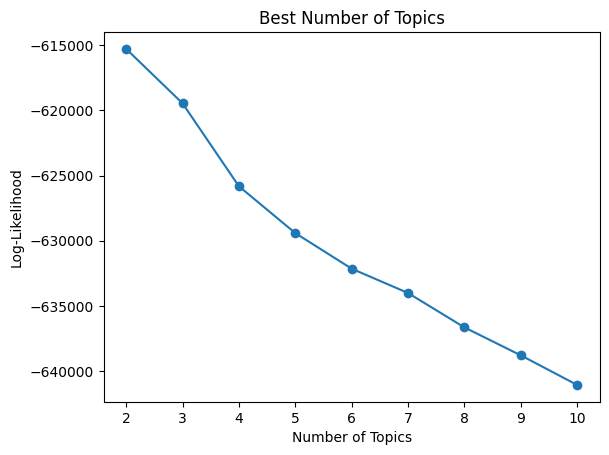

Best Number of Topics: 2


In [178]:
# optimal_topics = find_best_n_components(X)
optimal_topics = 2

In [194]:
# lda_model = LatentDirichletAllocation(n_components=optimal_topics, random_state=42)
lda_model = LatentDirichletAllocation(n_components=10, random_state=42)
lda_topics = lda_model.fit_transform(X)

In [195]:
df["theme"] = np.argmax(lda_topics, axis=1)

In [196]:
def get_topic_keywords(lda_model, vectorizer, n_top_words=5):
    words = vectorizer.get_feature_names_out()
    topic_keywords = {}
    
    for topic_idx, topic in enumerate(lda_model.components_):
        top_words_idx = topic.argsort()[-n_top_words:][::-1]
        top_words = [words[i] for i in top_words_idx]
        topic_keywords[f"Theme {topic_idx}"] = top_words
    
    return topic_keywords

In [197]:
theme_keywords = get_topic_keywords(lda_model, vectorizer, n_top_words=5)

In [198]:
for theme, words in theme_keywords.items():
    print(f"{theme}: {', '.join(words)}")

Theme 0: king, thereof, judah, hand, house
Theme 1: shall, land, upon, shalt, come
Theme 2: god, man, let, heart, good
Theme 3: ye, unto, shall, lord, hath
Theme 4: lord, unto, saith, god, shall
Theme 5: unto, said, man, came, jesus
Theme 6: two, hundred, men, one, years
Theme 7: son, children, father, unto, israel
Theme 8: thou, thy, thee, unto, said
Theme 9: day, came, went, israel, unto


In [61]:
# heatmap = (
#     alt.Chart(theme_counts)
#     .mark_rect()
#     .encode(
#         x=alt.X("chapter_number:O", title="Chapter Number"),
#         y=alt.Y("book_name:N", title="Book Name"),
#         color=alt.Color("theme:Q", title="Identified Theme"),
#         tooltip=["book_name", "chapter_number", "theme"]
#     )
#     .properties(title="Thematic Heatmap of Bible Verses", width=700, height=400)
#     .interactive()
# )

# display(heatmap)

#### 2

In [46]:
import pandas as pd
import altair as alt

import torch
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import spacy

from sentence_transformers import SentenceTransformer
from bertopic import BERTopic

from IPython.display import display, Markdown

In [47]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# print(device)

In [49]:
nlp = spacy.load("en_core_web_sm")

custom_stop_words = {"unto", "shall", "thou", "thee", "thy", "hath", "ye"}
stop_words = nlp.Defaults.stop_words | custom_stop_words

In [50]:
def preprocess_text(text):
    doc = nlp(text.lower())
    tokens = []
    for token in doc:
        if token.is_alpha and token.text not in stop_words and token.lemma_ != "-PRON-":
            tokens.append(token.lemma_)
    return " ".join(tokens)

In [51]:
df["processed_text"] = df["verse_text"].apply(preprocess_text)

In [53]:
embedding_model = SentenceTransformer('all-MiniLM-L6-v2', device=device)
topic_model = BERTopic(language="english", 
                    embedding_model=embedding_model, 
                    verbose=True, 
                    calculate_probabilities=True,
                    nr_topics=10)

In [54]:
topics, probs = topic_model.fit_transform(df["processed_text"])

2025-01-20 00:16:35,216 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/972 [00:00<?, ?it/s]

2025-01-20 00:16:42,918 - BERTopic - Embedding - Completed ✓
2025-01-20 00:16:42,919 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-01-20 00:16:47,676 - BERTopic - Dimensionality - Completed ✓
2025-01-20 00:16:47,677 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-01-20 00:19:09,406 - BERTopic - Cluster - Completed ✓
2025-01-20 00:19:09,407 - BERTopic - Representation - Extracting topics from clusters using representation models.
2025-01-20 00:19:09,749 - BERTopic - Representation - Completed ✓
2025-01-20 00:19:09,750 - BERTopic - Topic reduction - Reducing number of topics
2025-01-20 00:19:09,943 - BERTopic - Topic reduction - Reduced number of topics from 383 to 10


In [55]:
df["topic"] = topics

In [56]:
print(topic_model.get_topic_info())

   Topic  Count                                 Name  \
0     -1  11919                 -1_lord_god_man_come   
1      0  18046                   0_lord_say_son_god   
2      1    400  1_accord_thousand_tribe_inheritance   
3      2    336         2_gold_silver_shekel_incense   
4      3    250       3_cubit_thereof_breadth_pillar   
5      4     56    4_duke_macedonia_hivite_perizzite   
6      5     54                5_answer_job_say_know   
7      6     15   6_stranger_strange_flattereth_fade   
8      7     14         7_precept_line_little_forget   
9      8     12       8_weight_balance_diver_measure   

                                      Representation  \
0  [lord, god, man, come, say, day, king, israel,...   
1  [lord, say, son, god, come, man, king, israel,...   
2  [accord, thousand, tribe, inheritance, number,...   
3  [gold, silver, shekel, incense, candlestick, t...   
4  [cubit, thereof, breadth, pillar, length, meas...   
5  [duke, macedonia, hivite, perizzite, hittite

In [57]:
topic_summary = (
    df.groupby(["book_name", "topic"])
      .size()
      .reset_index(name="verse_count")
)

In [59]:
book_selection = alt.selection_point(
    fields=["book_name"], 
    bind=alt.binding_select(options=sorted(df["book_name"].unique().tolist()), name="Book:")
)

In [60]:
chart = alt.Chart(topic_summary).mark_bar().encode(
    x=alt.X("topic:N", title="Topic"),
    y=alt.Y("verse_count:Q", title="Number of Verses"),
    color=alt.Color("topic:N", legend=None),
    tooltip=["book_name", "topic", "verse_count"]
).add_selection(
    book_selection
).transform_filter(
    book_selection
).properties(
    title="Distribution of Topics per Book (Interactive)",
    width=600,
    height=400
)

display(chart)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16272\3258758890.py:6: AltairDeprecationWarning: 
Deprecated since `altair=5.0.0`. Use add_params instead.
  ).add_selection(


alt.Chart(...)

### Testament Interconnection

In [145]:
import numpy as np
import pandas as pd

import altair as alt
import plotly.graph_objects as go
import networkx as nx

from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer

from IPython.display import display, Markdown

In [146]:
df = pd.read_csv("../data/kjv.csv")
df = df.astype({col: 'string' for col in df.select_dtypes(include='object').columns})

df.drop(['version_name', 'version_abbr'], axis=1, inplace=True)

In [147]:
df_ot = df[df['testament_abbr'] == 'OT']
df_nt = df[df['testament_abbr'] == 'NT']

In [148]:
model = SentenceTransformer('paraphrase-mpnet-base-v2')

ot_embeddings = model.encode(df_ot['verse_text'].tolist(), convert_to_numpy=True)
nt_embeddings = model.encode(df_nt['verse_text'].tolist(), convert_to_numpy=True)

In [149]:
similarity_matrix = cosine_similarity(ot_embeddings, nt_embeddings)

In [ ]:
edges = []
for ot_idx, similarities in enumerate(similarity_matrix):
    nt_indices = np.where(similarities >= 0.75)[0]
    for nt_idx in nt_indices:
        edges.append({
            'ot_index': ot_idx,
            'nt_index': nt_idx,
            'similarity': similarities[nt_idx]
        })

print(f"Prophecy-Fulfillment Links: {len(edges)}")

Found 2824 potential prophecy-fulfillment links.


In [151]:
G = nx.Graph()

for idx, row in df_ot.iterrows():
    G.add_node(f"OT_{idx}", 
               label=f"{row['book_name']} {row['chapter_number']}:{row['verse_number']}",
               testament='OT',
               verse_text=row['verse_text'])
    
for idx, row in df_nt.iterrows():
    G.add_node(f"NT_{idx}", 
               label=f"{row['book_name']} {row['chapter_number']}:{row['verse_number']}",
               testament='NT',
               verse_text=row['verse_text'])

for edge in edges:
    ot_node = f"OT_{df_ot.index[edge['ot_index']]}"
    nt_node = f"NT_{df_nt.index[edge['nt_index']]}"
    G.add_edge(ot_node, nt_node, weight=edge['similarity'])

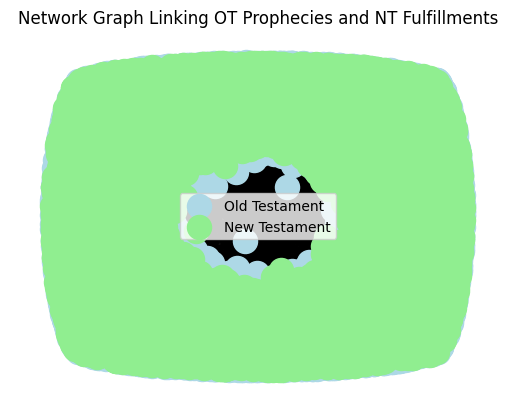

In [ ]:
pos = nx.spring_layout(G, k=0.5, iterations=5)

ot_nodes = [n for n, attr in G.nodes(data=True) if attr['testament'] == 'OT']
nt_nodes = [n for n, attr in G.nodes(data=True) if attr['testament'] == 'NT']

nx.draw_networkx_nodes(G, pos, nodelist=ot_nodes, node_color='lightblue', label='Old Testament')
nx.draw_networkx_nodes(G, pos, nodelist=nt_nodes, node_color='lightgreen', label='New Testament')

edges_weights = [G[u][v]['weight'] for u,v in G.edges()]
nx.draw_networkx_edges(G, pos, alpha=0.5, width=[w*2 for w in edges_weights])

plt.legend(scatterpoints=1)
plt.title("Network Graph Linking OT Prophecies and NT Fulfillments")
plt.axis('off')
plt.show()